## DataFrames with Pandas (Data Containers IV)

- `pd.DataFrame({})` produces a DataFrame from a dictionary
- `pd.DataFrame(dict(list(zip([],[]))))` produces a DataFrame from a list of names and list of lists

In [93]:
foo1 = [True, False, False, True, True, False]
foo2 = ["Liver", "Brain", "Testes", "Muscle", "Intestine", "Heart"]
foo3 = [13, 88, 1233, 55, 233, 18]

In [94]:
# We have already imported pandas as pd
# use a dictionary to get a data frame
foo_df = pd.DataFrame({'healthy': foo1, 
                       'tissue': foo2, 
                       'quantity': foo3})

In [95]:
foo_df

,healthy,tissue,quantity
0,True,Liver,13
1,False,Brain,88
2,False,Testes,1233
3,True,Muscle,55
4,True,Intestine,233
5,False,Heart,18


**Exercise 4.1**

In [96]:
distDictDF = pd.DataFrame({"City": cities,
                           "Distance": dist})
distDictDF

,City,Distance
0,Munich,584
1,Paris,1054
2,Amsterdam,653
3,Madrid,2301
4,Istanbul,2191


#### From Lists (jsut as an example)

In [97]:
# names
list_names = ['healthy', 'tissue', 'quantity']

# columns are a list of lists
list_cols = [foo1, foo2, foo3]
list_cols

[[True, False, False, True, True, False],
 ['Liver', 'Brain', 'Testes', 'Muscle', 'Intestine', 'Heart'],
 [13, 88, 1233, 55, 233, 18]]

In [98]:
zip_list = list(zip(list_names, list_cols))
zip_list

[('healthy', [True, False, False, True, True, False]),
 ('tissue', ['Liver', 'Brain', 'Testes', 'Muscle', 'Intestine', 'Heart']),
 ('quantity', [13, 88, 1233, 55, 233, 18])]

In [99]:
zip_dict = dict(zip_list)
zip_dict # True dictionary

{'healthy': [True, False, False, True, True, False],
 'tissue': ['Liver', 'Brain', 'Testes', 'Muscle', 'Intestine', 'Heart'],
 'quantity': [13, 88, 1233, 55, 233, 18]}

In [100]:
zip_df = pd.DataFrame(zip_dict)
zip_df

,healthy,tissue,quantity
0,True,Liver,13
1,False,Brain,88
2,False,Testes,1233
3,True,Muscle,55
4,True,Intestine,233
5,False,Heart,18


### Working with DataFrames

In [101]:
foo_df['healthy'] #indexing by name, an individual column "Series", 1-dim array

0     True
1    False
2    False
3     True
4     True
5    False
Name: healthy, dtype: bool

In [102]:
foo_df[['healthy']] # DataFrame with 1 column

,healthy
0,True
1,False
2,False
3,True
4,True
5,False


In [103]:
foo_df.healthy # Get the Series using a `.` notation

0     True
1    False
2    False
3     True
4     True
5    False
Name: healthy, dtype: bool

In [104]:
# Add a new column and populate it with the value (which is recycled, i.e. "broadcast" over the length of the Series)
foo_df['new'] = 0
foo_df

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0
2,False,Testes,1233,0
3,True,Muscle,55,0
4,True,Intestine,233,0
5,False,Heart,18,0


In [105]:
# But this doesn't work
foo_df.new2 = 4
foo_df

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0
2,False,Testes,1233,0
3,True,Muscle,55,0
4,True,Intestine,233,0
5,False,Heart,18,0


# Mini-case study - exercise 4.8

In [106]:
import pandas as pd
mtcars = pd.read_csv('data/mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


1. Calculate the correlation between `mpg` and `wt` and test if it is significant.

In [107]:
# corr() is not a function:
# corr(mtcars['mpg'], mtcars['wt'])

In [108]:
# A correlation matrix
cor_mat = mtcars.corr()
cor_mat[['wt']].iloc[0]

wt   -0.867659
Name: mpg, dtype: float64

In [109]:
# Targeted correlation between two Series in the DataFrame
mtcars['mpg'].corr(mtcars['wt'])

SyntaxError: invalid character in identifier (4228633305.py, line 2)

In [ ]:
# Using NumPy
r = np.corrcoef(mtcars['mpg'], mtcars['wt'])
r

array([[ 1.        , -0.86765938],
       [-0.86765938,  1.        ]])

In [ ]:
# import pingouin as pg  
# pg.corr(x=mtcars['mpg'], y=mtcars['wt'])

In [ ]:
import scipy.stats as stats
stats.pearsonr(mtcars['mpg'], mtcars['wt'])

(-0.8676593765172279, 1.2939587013504974e-10)

2. Visualize the relationship in an XY scatter plot (bonus points for a regression line).


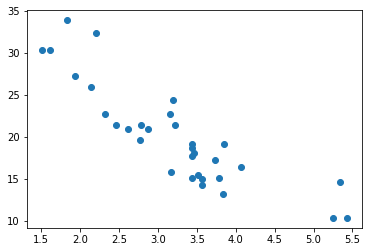

In [ ]:
# previously imported seaborn (see above)
# sns.scatter(x=mtcars['mpg'], y=mtcars['wt'])

import matplotlib.pyplot as plt # Low level plotting
y = mtcars.mpg
x = mtcars.wt
plt.scatter(x,y)
# plt.show()

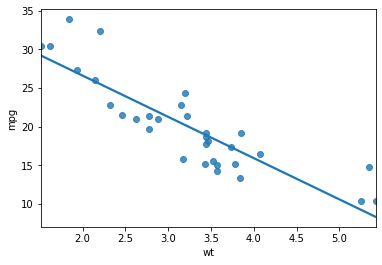

In [ ]:
sns.regplot(x="wt", y="mpg", data = mtcars, ci=None)

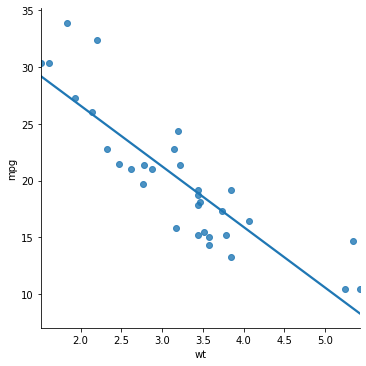

In [ ]:
sns.lmplot(x="wt", y="mpg", data=mtcars, ci=None)

In [ ]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression().fit(x, y)

In [ ]:
from statsmodels.formula.api import ols
model = ols("mpg ~ wt", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           1.29e-10
Time:                        19:04:02   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For plotting:

- Continuous vs continuous (i.e. scatter plot), but also
- Continuous vs categorical, or 
- Categorical vs continuous

**Y-Axis**
- Dependent variable (i.e. _dependent_ on the indpendent variable)
- Response (i.e. the _outcome_)
- f(x) (i.e. y _as a function of_ x)

**X-Axis**
- Independent variable (i.e. decided upon by the experimenter)
- Predictor (a variable that _predicts_ a specific resonse, i.e. y)

3. Convert `wt` column from pounds to kg (bouns points for adding it to the DataFrame).

In [ ]:
# Avoid making unnecessary new objects that are separate from your DataFrame
#twocol = mtcars[['mpg','wt']]
#twocol['kilo'] = y/2.2046
#twocol

In [117]:
mtcars["wt"]

0     2.620
1     2.875
2     2.320
3     3.215
4     3.440
5     3.460
6     3.570
7     3.190
8     3.150
9     3.440
10    3.440
11    4.070
12    3.730
13    3.780
14    5.250
15    5.424
16    5.345
17    2.200
18    1.615
19    1.835
20    2.465
21    3.520
22    3.435
23    3.840
24    3.845
25    1.935
26    2.140
27    1.513
28    3.170
29    2.770
30    3.570
31    2.780
Name: wt, dtype: float64

In [ ]:
mtcars["wt"].apply(lambda x: x/2.2046)

0     1.188424
1     1.304091
2     1.052345
3     1.458314
4     1.560374
5     1.569446
6     1.619341
7     1.446975
8     1.428831
9     1.560374
10    1.560374
11    1.846140
12    1.691917
13    1.714597
14    2.381384
15    2.460310
16    2.424476
17    0.997913
18    0.732559
19    0.832351
20    1.118117
21    1.596662
22    1.558106
23    1.741813
24    1.744081
25    0.877710
26    0.970698
27    0.686292
28    1.437903
29    1.256464
30    1.619341
31    1.261000
Name: wt, dtype: float64

In [ ]:
mtcars['wt_kg'] = mtcars['wt']/2.2046226218

In [ ]:
# Alternatvely:
# mtcars['wt_kg_2'] = mtcars['wt']*0.453592

# Indexing


In [ ]:
foo_df

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0
2,False,Testes,1233,0
3,True,Muscle,55,0
4,True,Intestine,233,0
5,False,Heart,18,0


In [ ]:
foo_df['tissue']

0        Liver
1        Brain
2       Testes
3       Muscle
4    Intestine
5        Heart
Name: tissue, dtype: object

In [ ]:
foo_df[['tissue']]

,tissue
0,Liver
1,Brain
2,Testes
3,Muscle
4,Intestine
5,Heart


In [ ]:
foo_df.tissue

0        Liver
1        Brain
2       Testes
3       Muscle
4    Intestine
5        Heart
Name: tissue, dtype: object

index position as number with `.iloc[]`

In [ ]:
# First row, as a Series
foo_df.iloc[0] 

healthy      True
tissue      Liver
quantity       13
new             0
Name: 0, dtype: object

In [ ]:
# First row, as a DataFrame
foo_df.iloc[[0]] 

,healthy,tissue,quantity,new
0,True,Liver,13,0


In [ ]:
foo_df.iloc[[0, 1]] 

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0


Using two dimensions:

In [ ]:
# To get all columns, use : after the comma
foo_df.iloc[0,:] # : == everything 

healthy      True
tissue      Liver
quantity       13
new             0
Name: 0, dtype: object

In [ ]:
# Valid
# foo_df.iloc[0,]

Indexing begins at 0 and is _exclusive_

In [ ]:
# The first two columns, all rows
foo_df.iloc[:,:2] # 0, 1, and exclude 2

,healthy,tissue
0,True,Liver
1,False,Brain
2,False,Testes
3,True,Muscle
4,True,Intestine
5,False,Heart


In [ ]:
# One column as a Series
foo_df.iloc[:,1]

0        Liver
1        Brain
2       Testes
3       Muscle
4    Intestine
5        Heart
Name: tissue, dtype: object

In [ ]:
# The same, as a DataFrame
foo_df.iloc[:,1:2]

,tissue
0,Liver
1,Brain
2,Testes
3,Muscle
4,Intestine
5,Heart


In [ ]:
# counting from the opposite direction
# -1 is the last row
foo_df.iloc[-1,]
# forward: 0  1  2  3  4  5
# Reverse -6 -5 -4 -3 -2 -1

healthy     False
tissue      Heart
quantity       18
new             0
Name: 5, dtype: object

In [ ]:
foo_df

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0
2,False,Testes,1233,0
3,True,Muscle,55,0
4,True,Intestine,233,0
5,False,Heart,18,0


In [ ]:
foo_df.reverse()

AttributeError: ignored

**Exercise 5.1**

Using foo_df, retreive:

The 2nd to 3rd rows

In [ ]:
# foo_df.iloc[2:3, :] # only the 3rd row
# foo_df.iloc[[2,3],:] # the 3rd & the 4th row using a list
# foo_df.iloc[2:4] # the 3rd & the 4th row using : notation
# foo_df.iloc[0:2,]  # 1st & 2nd rows
# foo_df[-1:2,:] # Computer says "no"
# foo_df.iloc[3:,:] # 4th to the end 

# yes :)
foo_df.iloc[[1, 2]]  # 2nd & 3rd rows using a list
# foo_df.iloc[1:3,:] # 2nd & 3rd rows using : notation


The last 2 rows

In [ ]:
foo_df[-2:]

In [ ]:
# The last two no matter how long
foo_df.iloc[-2:]
# foo_df.iloc[[-1,-2],:] # specify the order with a list

In [ ]:
# Hard coding positions
# foo_df.iloc[ [4, 5],:]
# foo_df.iloc[4:,:] 

A random row in foo_df

In [ ]:
# import random
# foo_df.iloc[[random.randrange(0, len(foo_df))]]
foo_df.sample()

From the 4th to the last row
(But without hard-coding, i.e. regardless of how many rows my data frame contains)

In [ ]:
# foo_df[3:]
foo_df.iloc[3:,:]


** Exercise 5.2**

Using `.iloc()` with:



In [ ]:
# Integers? yes :)
foo_df.iloc[4,]


In [ ]:
# Floats? Computer says no
# foo_df[0.1:]

In [ ]:
# Strings (Characters)? Computer says "no"
# foo_df.iloc[:,'tissue']
# foo_df.iloc['Brain'] # need to look inside the tissue column
# foo_df.iloc['A'] # No is no 'A' anyways
# foo_df[heart:]   # No object defined 

In [ ]:
# A heterogenous list? Computer says "no"
# foo_df.iloc[:,[1, 'quantity']]



In [ ]:
# A homogenous list?
foo_df.iloc[[1,4,-1,-1,3,2,0]]


**Exercise 5.3**

Use indexing to obtain all the odd rows


In [ ]:
foo_df.iloc[1::2] # 2nd, 4th, 6th

In [ ]:
foo_df.iloc[lambda x: x.index % 2 == 1]

In [ ]:
foo_df[foo_df.index % 2 != 0]

Use indexing to obtain all the even rows

In [ ]:
foo_df.iloc[::2] # 1st, 3rd, 5th

In [ ]:
foo_df.iloc[lambda x: x.index % 2 == 0]

# Logical Expressions

Relational and logical operators

In [ ]:
foo_df[foo_df.quantity >= 233]

In [ ]:
foo_df[(foo_df.tissue == "Heart") | (foo_df.quantity >= 233)]

**Exercise 5.4**

Only “healthy” samples.


In [ ]:
foo_df[foo_df.healthy]


Only “unhealthy” samples.


In [ ]:
foo_df[-foo_df.healthy] 


In [ ]:
foo_df[~foo_df.healthy] 


**Exercise 5.5**


Only low quantity samples, those below 100.

Midrange: Quantity between 100 and 1000,


Tails of the distribution: Quantity below 100 and beyond 1000.


**Exercise 5.6**

Only “Heart” samples.

“Heart” and “liver” samples


Everything except “intestines”
